In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('sid.csv')

# Preprocessing step
# Drop irrelevant columns if needed
data = data.drop(['customerID', 'TotalCharges'], axis=1)

# Encode categorical variables
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])
data = pd.get_dummies(data)

# Handling missing values if any
data = data.dropna()

# Splitting the dataset into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression
accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1-score: {f1_lr}")

# Evaluate Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

# Evaluate Gradient Boosting
accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(y_test, y_pred_gb)
print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1-score: {f1_gb}")


Logistic Regression:
Accuracy: 0.8197303051809794, Precision: 0.6888888888888889, Recall: 0.5817694369973191, F1-score: 0.6308139534883722

Random Forest:
Accuracy: 0.7906316536550745, Precision: 0.6373239436619719, Recall: 0.48525469168900803, F1-score: 0.5509893455098935

Gradient Boosting:
Accuracy: 0.8147622427253371, Precision: 0.6879194630872483, Recall: 0.5495978552278821, F1-score: 0.6110283159463488


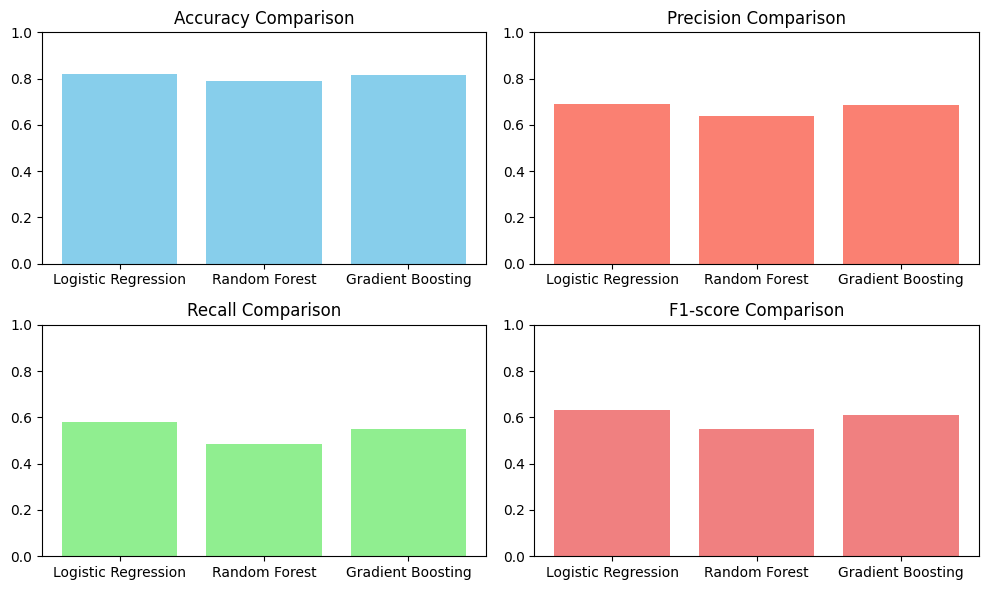

In [ ]:
import matplotlib.pyplot as plt

# Evaluation results
classifiers = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_gb]
precision_scores = [precision_lr, precision_rf, precision_gb]
recall_scores = [recall_lr, recall_rf, recall_gb]
f1_scores = [f1_lr, f1_rf, f1_gb]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy comparison
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)

# Precision comparison
plt.subplot(2, 2, 2)
plt.bar(classifiers, precision_scores, color='salmon')
plt.title('Precision Comparison')
plt.ylim(0, 1)

# Recall comparison
plt.subplot(2, 2, 3)
plt.bar(classifiers, recall_scores, color='lightgreen')
plt.title('Recall Comparison')
plt.ylim(0, 1)

# F1-score comparison
plt.subplot(2, 2, 4)
plt.bar(classifiers, f1_scores, color='lightcoral')
plt.title('F1-score Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
